Copyright (c) 2021 Python Charmers. All rights reserved. Please do not distribute.

Welcome!

# Setup

Here are some setup instructions:

## Browser

Please use Chrome or Firefox or Safari. *Preferably not IE or Edge*.

## JupyterHub server

1. Go to [https://hub.pythoncharmers.com/](https://hub.pythoncharmers.com/)
2. Your username is your email address
3. The password is the same as you used to log in to Zulip and is in the setup email.

## Create a new notebook

- Rename it "Yourname Day 1.ipynb".
- Save it (Control-S or File | Save Notebook).

We'll give more instructions on getting started with the notebooks as we start the course.

## Zulip chat server

1. Go to [https://pythoncharmers.zulipchat.com](https://pythoncharmers.zulipchat.com)
2. **Test:** Please send a message to our stream (#**523 Python for Geospatial Analysis** ) saying Hi!

## Resources

- Please download the course materials PDF (in your home folder)
- You may also download the `.zip` file containing the Jupyter Notebooks of the course materials

## Trainer notebook

We suggest that you load up the trainer's notebook from the Trainer folder in a separate browser tab and reload when needed.

(To do this, right-click the file, then choose "Open in New Browser Tab". Then hit F5 or Command-R whenever you want to see the latest version of the trainer's notebook.)

## Outline

- Reading & writing vector data with *Geopandas* and *GDAL*
- Reading and writing rasters with *Rasterio*
- Working with *NetCDF* data with *xarray*
- Projections with *Geopandas*, *pyproj* and *shapely*
- Creating beautiful maps and overlaying statistical data
- Introduction to vector and raster image analysis with *scikit-image*
  and *SciPy*

## Background

1. Paid professional products - Esri ArcGIS, MapInfo, SpatialNET
2. Open Source - QGIS, Grass
3. "Pure Python" - the scripting side

For scripting there a few levels

- GDAL / OGR
  - Reading raster data (GDAL)
  - Reading vector data (OGR)
  
Vector data

- OGR
  - Fiona - much more Python-like for reading vector data
    - GeoPandas
  - PyProj
  - Shapely - actual Points, Polygons, Lines
  
Raster side

- GDAL
  - Rasterio
    - xarray (and rio-xarray)
    
Network data (networkx)

TINs (scipy)

Point clouds (pdal, etc...)

## Vector data

In [1]:
import geopandas as gpd

In [3]:
buildings = gpd.read_file('Data/spatial/melbourne_buildings.shp')
buildings

osm_id                       name              type  \
0      4817059  Royal Exhibition Building        attraction   
1      5456102                       None              None   
2     11914778              Langham Hotel             hotel   
3     12477419                       None              None   
4     13127644     Saint Paul's Cathedral  place_of_worship   
..         ...                        ...               ...   
717  154297010                       None              None   
718  154297011                       None              None   
719  154297012                       None              None   
720  154297014                       None              None   
721  154297016                       None              None   

                                              geometry  
0    POLYGON ((2497417.064 2410728.548, 2497414.228...  
1    POLYGON ((2495882.985 2410540.023, 2495829.952...  
2    POLYGON ((2496949.596 2408959.832, 2496971.322...  
3    POLYGON ((2496766.985 2409219.697, 2496805.349...  
4    POLYGON ((2497125.195 2409395.864, 2497144.158...  
..                                                 ...  
717  POLYGON ((2496991.440 2408596.640, 2496974.330...  
718  POLYGON ((2496965.357 2408541.004, 2496951.675...  
719  POLYGON ((2496787.377 2408641.160, 2496821.443...  
720  POLYGON ((2496622.062 2408610.429, 2496640.588...  
721  POLYGON ((2496610.853 2408614.065, 2496566.938...  

[722 rows x 4 columns]

In [5]:
poly = buildings.loc[0, "geometry"]
poly.area

9542.544483016061

In [6]:
type(poly)

shapely.geometry.polygon.Polygon

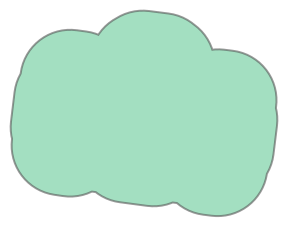

In [7]:
poly.buffer(50)

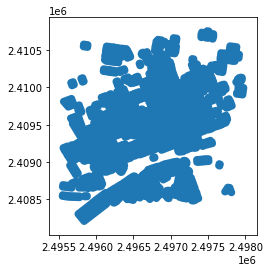

In [10]:
buildings.buffer(50).plot()

In [11]:
gpd.read_file?

Signature: gpd.read_file(filename, bbox=None, mask=None, rows=None, **kwargs)
Docstring:
Returns a GeoDataFrame from a file or URL.

.. versionadded:: 0.7.0 mask, rows

Parameters
----------
filename : str, path object or file-like object
    Either the absolute or relative path to the file or URL to
    be opened, or any object with a read() method (such as an open file
    or StringIO)
bbox : tuple | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter features by given bounding box, GeoSeries, GeoDataFrame or a
    shapely geometry. CRS mis-matches are resolved if given a GeoSeries
    or GeoDataFrame. Cannot be used with mask.
mask : dict | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter for features that intersect with the given dict-like geojson
    geometry, GeoSeries, GeoDataFrame or shapely geometry.
    CRS mis-matches are resolved if given a GeoSeries or GeoDataFrame.
    Cannot be used with bbox.
rows : int or slice, default None
    L

In [12]:
import fiona

In [13]:
fiona.open?

Signature:
fiona.open(
    fp,
    mode='r',
    driver=None,
    schema=None,
    crs=None,
    encoding=None,
    layer=None,
    vfs=None,
    enabled_drivers=None,
    crs_wkt=None,
    **kwargs,
)
Docstring:
Open a collection for read, append, or write

In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
OGR docs or ``ogr2ogr --help`` on the command line) and a schema
mapping such as:

  {'geometry': 'Point',
   'properties': [('class', 'int'), ('label', 'str'),
                  ('value', 'float')]}

must be provided. If a particular ordering of properties ("fields"
in GIS parlance) in the written file is desired, a list of (key,
value) pairs as above or an ordered dict is required. If no ordering
is needed, a standard dict will suffice.

A coordinate reference system for collections in write mode can be
defined by the ``crs`` parameter. It takes Proj4 style mappings like

  {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'WGS84',
   'no_defs': True}

short hand st

If you need to look up a driver: https://gdal.org

In [14]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [15]:
fiona.listlayers('Data/spatial/hannover.gpx')

['waypoints', 'routes', 'tracks', 'route_points', 'track_points']

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


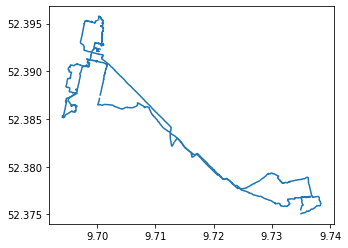

In [19]:
gpd.read_file("Data/spatial/hannover.gpx", driver='GPX', layer='tracks').plot()

In [20]:
fiona.listlayers("Data/spatial/john_snow.gpkg")

['pumps', 'deaths', 'buildings', 'vestry']

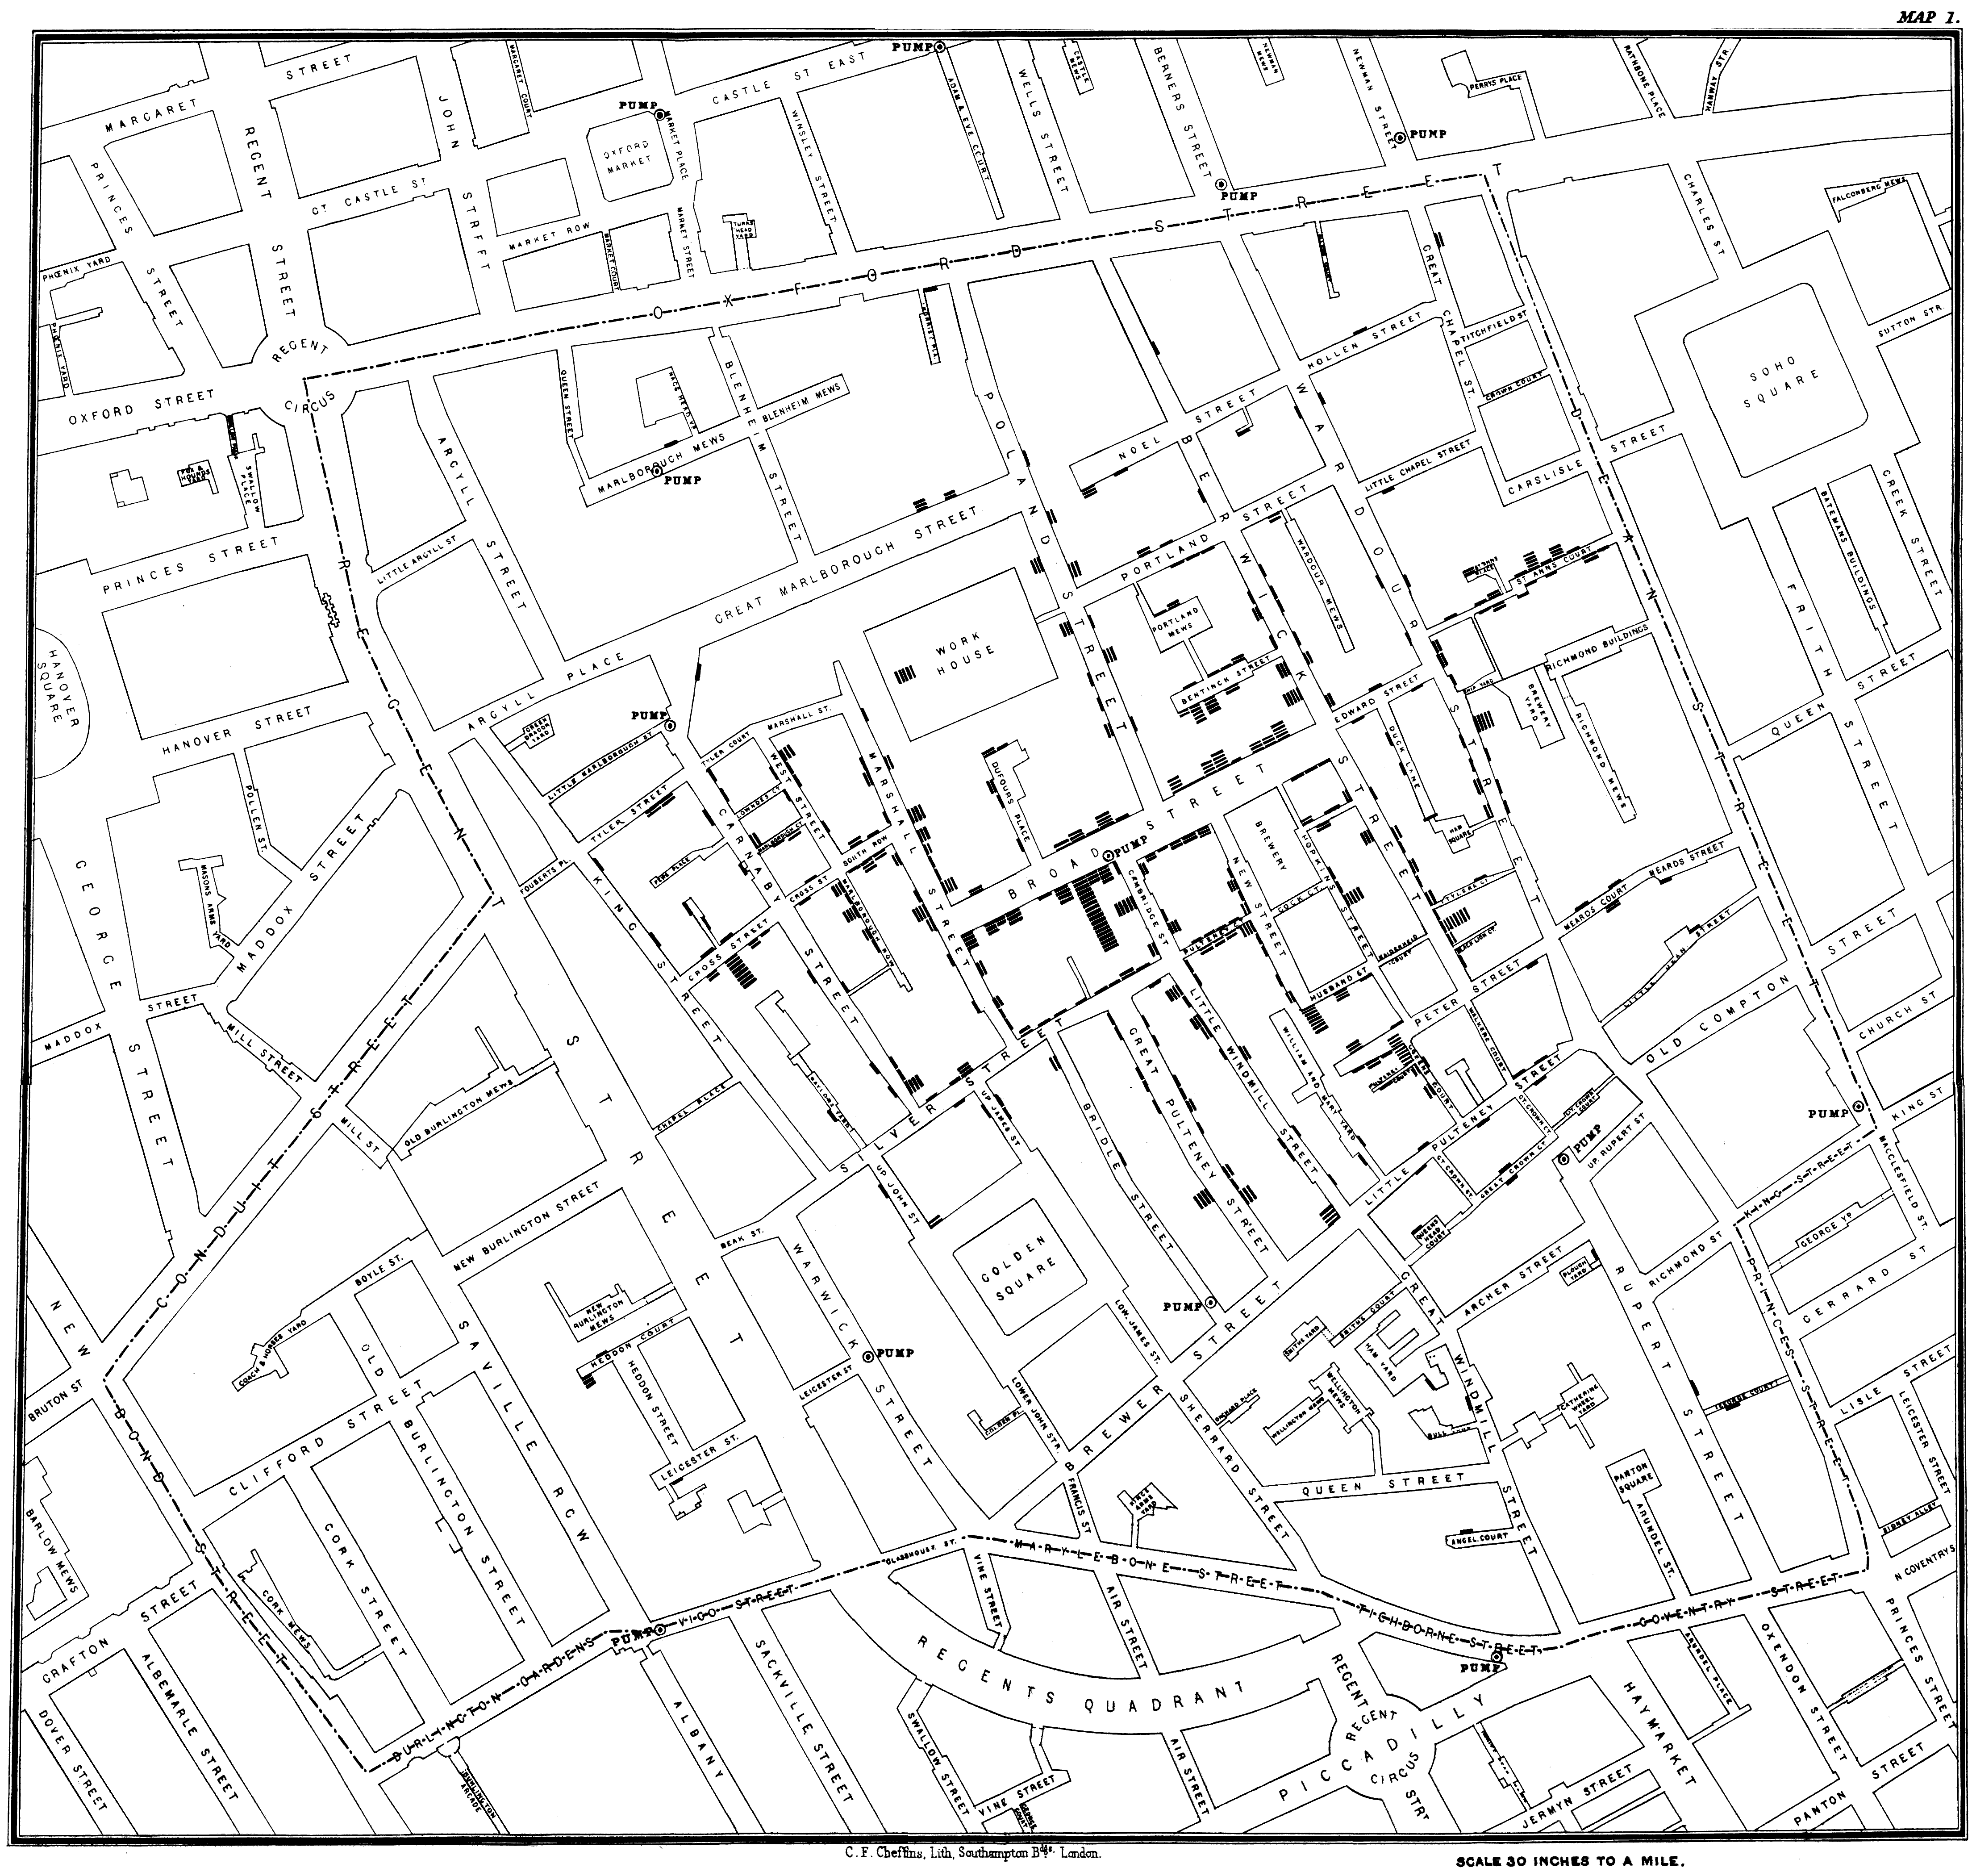

In [21]:
from PIL import Image
Image.open("Data/spatial/JohnSnow/snow_map.png")

In [22]:
pumps = gpd.read_file("Data/spatial/john_snow.gpkg", layer='pumps')

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


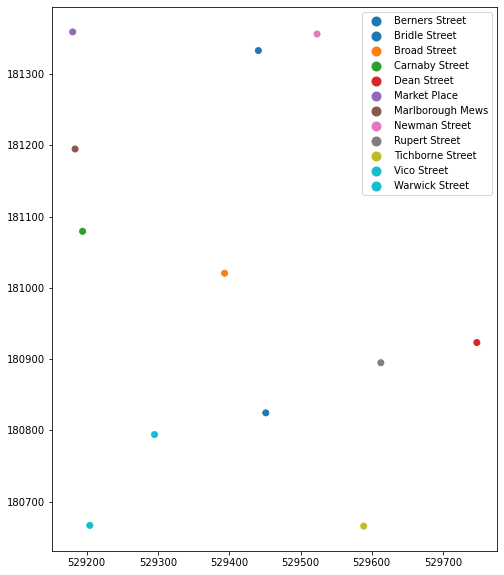

In [24]:
pumps.plot(column='location', legend=True, figsize=(10, 10))

In [25]:
deaths = gpd.read_file("Data/spatial/john_snow.gpkg", layer="deaths")

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [27]:
deaths

id    cat      long        lat  num_cases  \
0      1    1.0 -0.140795  51.515913        1.0   
1      2    2.0 -0.140379  51.512679        3.0   
2      3    3.0 -0.140304  51.512809        1.0   
3      4    4.0 -0.140501  51.516230        2.0   
4      5    5.0 -0.140375  51.515406        1.0   
..   ...    ...       ...        ...        ...   
317  318  318.0 -0.134147  51.515152        1.0   
318  319  319.0 -0.133930  51.514831        1.0   
319  320  320.0 -0.133521  51.511942        1.0   
320  321  321.0 -0.133253  51.511803        1.0   
321  322  322.0  0.000000   0.000000        2.0   

                               geometry  
0    MULTIPOINT (529163.243 181014.978)  
1    MULTIPOINT (529166.497 180780.299)  
2    MULTIPOINT (529173.293 180790.642)  
3    MULTIPOINT (529188.080 181041.198)  
4    MULTIPOINT (529190.335 180981.445)  
..                                  ...  
317  MULTIPOINT (529655.960 181018.662)  
318  MULTIPOINT (529669.858 180997.074)  
319  MULTIPOINT (529675.698 180791.427)  
320  MULTIPOINT (529693.636 180783.524)  
321  MULTIPOINT (529252.926 181030.817)  

[322 rows x 6 columns]

In [35]:
buildings = gpd.read_file("Data/spatial/john_snow.gpkg", layer="buildings")

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


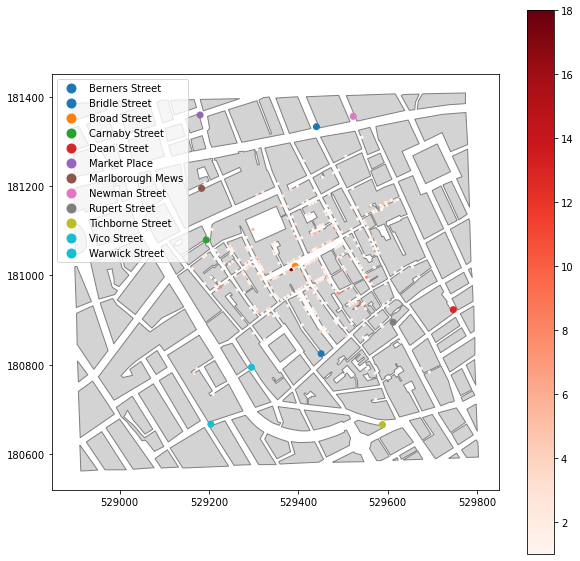

In [38]:
ax = buildings.plot(figsize=(10, 10), color='lightgray', edgecolor='gray')
pumps.plot(ax=ax, column='location', legend=True)  # Axes -> ax
deaths.plot(ax=ax, markersize=5, column='num_cases', legend=True, cmap='Reds')

We want to disprove the null hypothesis:

If we associate the deaths to the nearest pumps there is a uniform distribution (no spatial dependence) - i.e. put the pump anywhere and it'll have roughly the same number of associated deaths.

In [40]:
pumps.set_index("location", drop=False, inplace=True)
pumps

id          location                       geometry
location                                                             
Broad Street       1      Broad Street  POINT (529393.499 181020.578)
Market Place       2      Market Place  POINT (529180.385 181359.047)
Marlborough Mews   3  Marlborough Mews  POINT (529183.762 181194.822)
Berners Street     4    Berners Street  POINT (529440.865 181332.873)
Newman Street      5     Newman Street  POINT (529523.189 181356.092)
Carnaby Street     6    Carnaby Street  POINT (529194.316 181079.324)
Warwick Street     7    Warwick Street  POINT (529295.216 180794.279)
Vico Street        8       Vico Street  POINT (529204.448 180666.871)
Tichborne Street   9  Tichborne Street  POINT (529588.626 180665.860)
Rupert Street     10     Rupert Street  POINT (529612.689 180895.022)
Dean Street       11       Dean Street  POINT (529747.363 180923.307)
Bridle Street     12     Bridle Street  POINT (529451.274 180824.669)

In [42]:
poly.distance(poly)

0.0

In [45]:
type(poly.centroid)

shapely.geometry.point.Point

In [43]:
pumps.distance(poly)

location
Broad Street        2.973957e+06
Market Place        2.973844e+06
Marlborough Mews    2.973965e+06
Berners Street      2.973692e+06
Newman Street       2.973620e+06
Carnaby Street      2.974045e+06
Warwick Street      2.974192e+06
Vico Street         2.974347e+06
Tichborne Street    2.974094e+06
Rupert Street       2.973906e+06
Dean Street         2.973796e+06
Bridle Street       2.974066e+06
dtype: float64

In [46]:
deaths

id    cat      long        lat  num_cases  \
0      1    1.0 -0.140795  51.515913        1.0   
1      2    2.0 -0.140379  51.512679        3.0   
2      3    3.0 -0.140304  51.512809        1.0   
3      4    4.0 -0.140501  51.516230        2.0   
4      5    5.0 -0.140375  51.515406        1.0   
..   ...    ...       ...        ...        ...   
317  318  318.0 -0.134147  51.515152        1.0   
318  319  319.0 -0.133930  51.514831        1.0   
319  320  320.0 -0.133521  51.511942        1.0   
320  321  321.0 -0.133253  51.511803        1.0   
321  322  322.0  0.000000   0.000000        2.0   

                               geometry  
0    MULTIPOINT (529163.243 181014.978)  
1    MULTIPOINT (529166.497 180780.299)  
2    MULTIPOINT (529173.293 180790.642)  
3    MULTIPOINT (529188.080 181041.198)  
4    MULTIPOINT (529190.335 180981.445)  
..                                  ...  
317  MULTIPOINT (529655.960 181018.662)  
318  MULTIPOINT (529669.858 180997.074)  
319  MULTIPOINT (529675.698 180791.427)  
320  MULTIPOINT (529693.636 180783.524)  
321  MULTIPOINT (529252.926 181030.817)  

[322 rows x 6 columns]

## Exercise: distance to deaths

What result do you get from this?

In [47]:
pumps.distance(deaths)

/opt/conda/lib/python3.8/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
                    ..
Newman Street      NaN
Rupert Street      NaN
Tichborne Street   NaN
Vico Street        NaN
Warwick Street     NaN
Length: 334, dtype: float64

Why doesn't it work the way we want it to? We want a matrix / table of distances from each point in pumps to each point in depths. Try this instead:

In [49]:
distances = pumps["geometry"].apply(deaths["geometry"].distance)

In [50]:
# distances is just a regular dataframe

In [51]:
type(distances)

geopandas.geodataframe.GeoDataFrame

What is this showing you?

Calculate the minimum distance from each column using the `.min()` function on the distance table. This is how far each point in deaths is to the nearest pump. What is the nearest pump for each point in deaths? Use `.idxmin()` to find out.

Finally add the nearest pump to the deaths table as a new column. `deaths["pump"] = ...`

In [53]:
distances.idxmin()  # row index of minimum value

0      Carnaby Street
1         Vico Street
2      Warwick Street
3      Carnaby Street
4      Carnaby Street
            ...      
317     Rupert Street
318       Dean Street
319     Rupert Street
320     Rupert Street
321    Carnaby Street
Length: 322, dtype: object

In [54]:
distances.idxmin(axis='columns')  # you can go the other way if you want...

location
Broad Street        116
Market Place         58
Marlborough Mews      6
Berners Street      130
Newman Street       261
Carnaby Street        7
Warwick Street       69
Vico Street           9
Tichborne Street    289
Rupert Street       299
Dean Street         318
Bridle Street       176
dtype: int64

In [56]:
deaths["pump"] = distances.idxmin()

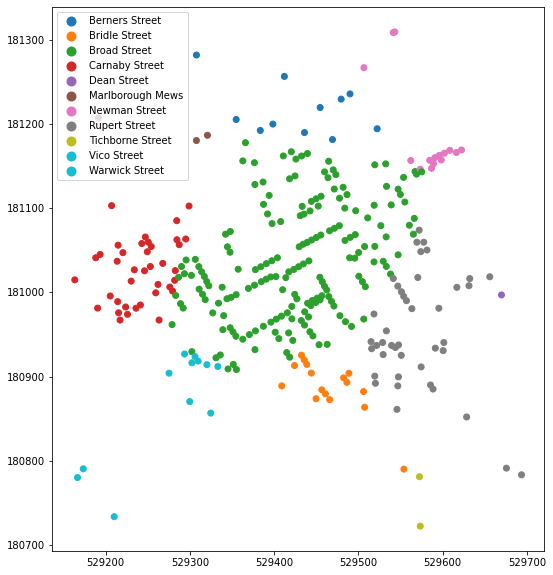

In [59]:
deaths.plot(figsize=(10, 10), column='pump', legend=True)

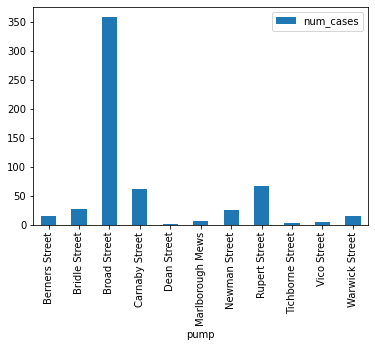

In [61]:
deaths.pivot_table(index='pump', values='num_cases', aggfunc='sum').plot(kind='bar')

There are some more spatial specific operations in the geodataframe

We might want to know which points are located in which building

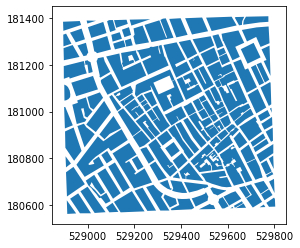

In [62]:
buildings.plot()

In [63]:
gpd.sjoin(deaths, buildings)  

id_left  cat_left      long        lat  num_cases  \
0          1       1.0 -0.140795  51.515913        1.0   
3          4       4.0 -0.140501  51.516230        2.0   
5          6       6.0 -0.140454  51.516284        2.0   
8          9       9.0 -0.140196  51.515577        1.0   
10        11      11.0 -0.140150  51.516129        1.0   
..       ...       ...       ...        ...        ...   
314      315     315.0 -0.134258  51.512843        1.0   
315      316     316.0 -0.134471  51.515041        2.0   
317      318     318.0 -0.134147  51.515152        1.0   
318      319     319.0 -0.133930  51.514831        1.0   
320      321     321.0 -0.133253  51.511803        1.0   

                               geometry            pump  index_right  \
0    MULTIPOINT (529163.243 181014.978)  Carnaby Street           32   
3    MULTIPOINT (529188.080 181041.198)  Carnaby Street           32   
5    MULTIPOINT (529193.339 181045.133)  Carnaby Street           32   
8    MULTIPOINT (529205.328 180995.827)  Carnaby Street           32   
10   MULTIPOINT (529213.537 181037.087)  Carnaby Street           32   
..                                  ...             ...          ...   
314  MULTIPOINT (529628.457 180852.171)   Rupert Street           22   
315  MULTIPOINT (529631.233 181008.032)   Rupert Street           14   
317  MULTIPOINT (529655.960 181018.662)   Rupert Street           14   
318  MULTIPOINT (529669.858 180997.074)     Dean Street           14   
320  MULTIPOINT (529693.636 180783.524)   Rupert Street           26   

     id_right  cat_right  cat_  
0          33       33.0   0.0  
3          33       33.0   0.0  
5          33       33.0   0.0  
8          33       33.0   0.0  
10         33       33.0   0.0  
..        ...        ...   ...  
314        23       23.0   0.0  
315        15       15.0   0.0  
317        15       15.0   0.0  
318        15       15.0   0.0  
320        27       27.0   0.0  

[272 rows x 11 columns]

In [64]:
gpd.sjoin?

Signature:
gpd.sjoin(
    left_df,
    right_df,
    how='inner',
    op='intersects',
    lsuffix='left',
    rsuffix='right',
)
Docstring:
Spatial join of two GeoDataFrames.

Parameters
----------
left_df, right_df : GeoDataFrames
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column
op : string, default 'intersects'
    Binary predicate, one of {'intersects', 'contains', 'within'}.
    See http://shapely.readthedocs.io/en/latest/manual.html#binary-predicates.
lsuffix : string, default 'left'
    Suffix to apply to overlapping column names (left GeoDataFrame).
rsuffix : string, default 'right'
    Suffix to apply to overlapping column names (right GeoDataFrame).
File:      /opt/conda/lib/python3.8/site-packages/geopandas/tools/sjoin.py
Type:  

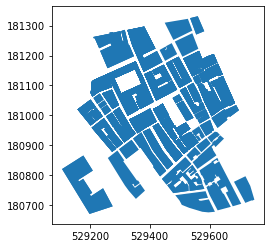

In [66]:
gpd.sjoin(buildings, deaths).plot()  # keeps the geometry from the left hand table

In [67]:
buildings_with_deaths = gpd.sjoin(buildings, deaths)

In [68]:
buildings_with_deaths

id_left  cat_left  cat_  \
0          1       1.0   0.0   
2          3       3.0   0.0   
2          3       3.0   0.0   
2          3       3.0   0.0   
2          3       3.0   0.0   
..       ...       ...   ...   
68        69      70.0   0.0   
68        69      70.0   0.0   
68        69      70.0   0.0   
131      132     133.0   0.0   
131      132     133.0   0.0   

                                              geometry  index_right  id_right  \
0    MULTIPOLYGON (((529483.853 181246.837, 529542....          222       223   
2    MULTIPOLYGON (((529512.146 181190.039, 529564....          276       277   
2    MULTIPOLYGON (((529512.146 181190.039, 529564....          284       285   
2    MULTIPOLYGON (((529512.146 181190.039, 529564....          292       293   
2    MULTIPOLYGON (((529512.146 181190.039, 529564....          253       254   
..                                                 ...          ...       ...   
68   MULTIPOLYGON (((529549.156 181002.191, 529586....          278       279   
68   MULTIPOLYGON (((529549.156 181002.191, 529586....          275       276   
68   MULTIPOLYGON (((529549.156 181002.191, 529586....          273       274   
131  MULTIPOLYGON (((529178.341 180866.065, 529209....            9        10   
131  MULTIPOLYGON (((529178.341 180866.065, 529209....            1         2   

     cat_right      long        lat  num_cases            pump  
0        223.0 -0.136731  51.518375        1.0  Berners Street  
2        277.0 -0.135718  51.516929        1.0    Broad Street  
2        285.0 -0.135546  51.517000        1.0    Broad Street  
2        293.0 -0.135466  51.517029        2.0   Newman Street  
2        254.0 -0.136035  51.517188        1.0    Broad Street  
..         ...       ...        ...        ...             ...  
68       279.0 -0.135435  51.514917        2.0   Rupert Street  
68       276.0 -0.135488  51.514994        8.0   Rupert Street  
68       274.0 -0.135533  51.515073        1.0   Rupert Street  
131       10.0 -0.139714  51.511973        1.0     Vico Street  
131        2.0 -0.140379  51.512679        3.0     Vico Street  

[272 rows x 11 columns]

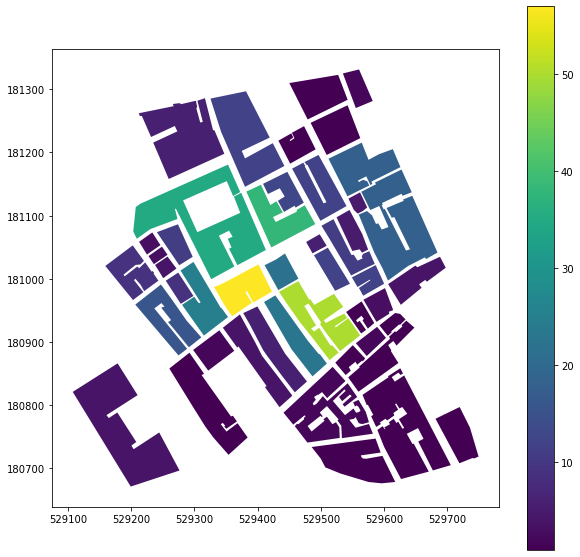

In [71]:
# a pivot table that includes geometries
buildings_with_deaths.dissolve('id_left', aggfunc='sum').plot(figsize=(10, 10), column='num_cases', legend=True)

### Writing out to a file

Here you'll want to know the driver

In [72]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [74]:
deaths.to_file('deaths.shp')

In [76]:
deaths.to_file('deaths.geojson', driver='GeoJSON')

## back at 10:45

## Projections

- Important
- Easy to reproject vector data (lossless)
- Hard to reproject raster data (lossy - avoid if possible)
  - If you need to reproject raster data do it via GDAL or QGIS - it's faster and more efficient
  
If you know the EPSG code most of the time you're fine. https://epsg.io

In [77]:
countries = gpd.read_file("Data/spatial/countries.gpkg")

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [79]:
countries.set_index("SOVEREIGNT", inplace=True)

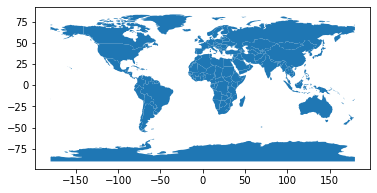

In [80]:
countries.plot()

In [82]:
countries.crs  # you can overwrite this, but that doesn't reproject the data. Instead:

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

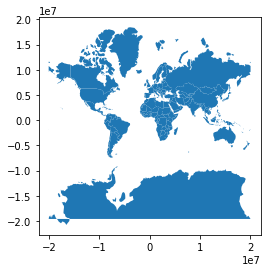

In [83]:
countries.to_crs(epsg=3857).plot()  # google maps projection

In [84]:
australia = countries.loc[["Australia", "New Zealand"]]
australia

featurecla  scalerank  LABELRANK SOV_A3  ADM0_DIF  LEVEL  \
SOVEREIGNT                                                                   
Australia    Admin-0 country          1          2    AU1         1      2   
New Zealand  Admin-0 country          1          2    NZ1         1      2   

                TYPE        ADMIN ADM0_A3  GEOU_DIF  ...  NAME_KO  \
SOVEREIGNT                                           ...            
Australia    Country    Australia     AUS         0  ...  오스트레일리아   
New Zealand  Country  New Zealand     NZL         0  ...     뉴질랜드   

                   NAME_NL        NAME_PL        NAME_PT         NAME_RU  \
SOVEREIGNT                                                                 
Australia        Australië      Australia      Austrália       Австралия   
New Zealand  Nieuw-Zeeland  Nowa Zelandia  Nova Zelândia  Новая Зеландия   

                 NAME_SV       NAME_TR      NAME_VI NAME_ZH  \
SOVEREIGNT                                                    
Australia     Australien    Avustralya           Úc    澳大利亚   
New Zealand  Nya Zeeland  Yeni Zelanda  New Zealand     新西兰   

                                                      geometry  
SOVEREIGNT                                                      
Australia    MULTIPOLYGON (((147.68926 -40.80826, 148.28907...  
New Zealand  MULTIPOLYGON (((176.88582 -40.06598, 176.50802...  

[2 rows x 94 columns]

## Exercise: Try some projections

Try these projections for both australia and the whole world in countries:

- 3112 - Geoscience Australia Lambera (conic)
- 3577 - Australian Albers Equal Area
- 2193 - New Zealand Mercator
- 28348 - Map Grid of Australia Zone 48
- 23855 - MGA Z 55 (Tasmania)
- 3031 - Antarctic Stereographic

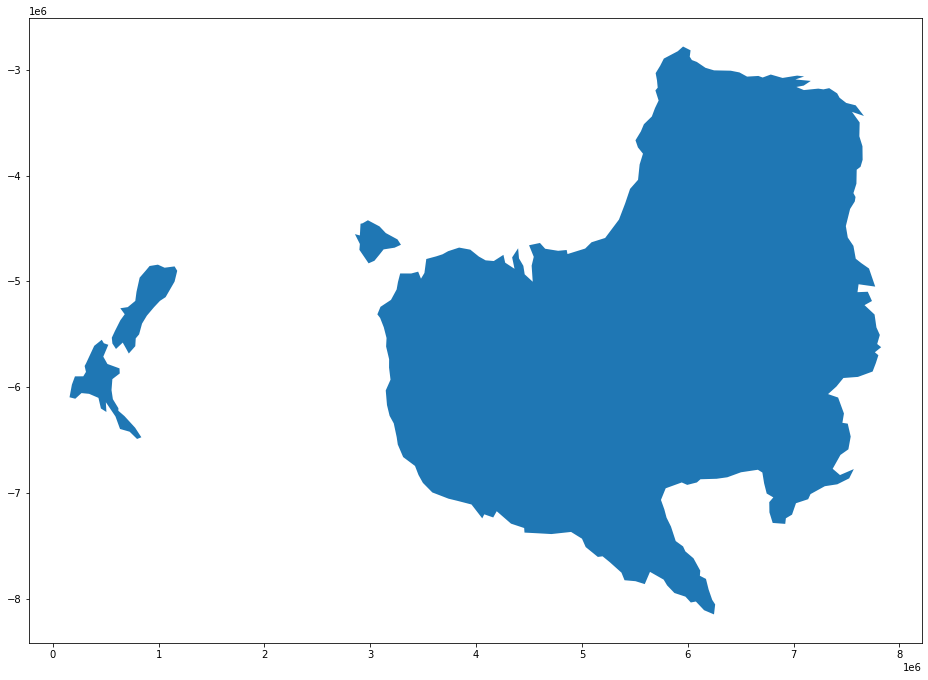

In [90]:
australia.to_crs(epsg=3031).plot(figsize=(16, 16))

In [91]:
import matplotlib.pyplot as plt

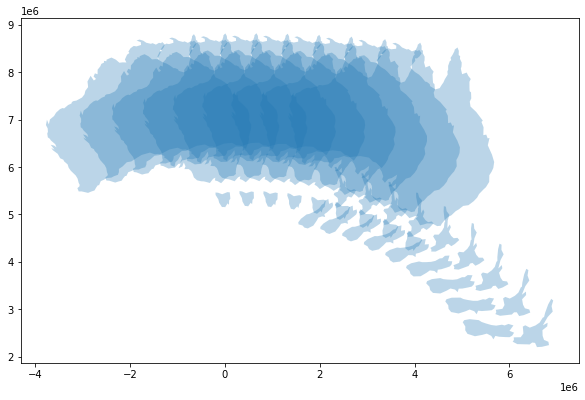

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))

for epsg in range(28348, 28357):
    australia.to_crs(epsg=epsg).plot(ax=ax, alpha=0.3)

You might not always have the EPSG number. If you don't you can use the pyproj library to create a projection object.

In [93]:
from pyproj import CRS

In [94]:
hobart = (147.325, -42.88)

In [95]:
my_crs = CRS(  # https://proj.org/operations/projections/stere.html
    proj='stere',   
    lat_0=-42.88,
    lon_0=147.325
)

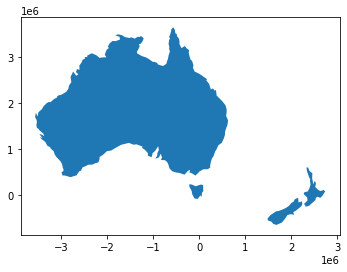

In [97]:
australia.to_crs(my_crs).plot()

## Exercise: Create a projection from Mollweide

https://proj.org/operations/projections/moll.html

Create a Mollweide for Hobart and plot out how Australia looks

In [98]:
my_crs = CRS(  # https://proj.org/operations/projections/stere.html
    proj='moll',   
    lat_0=-42.88,
    lon_0=147.325
)

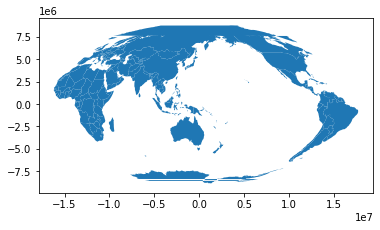

In [100]:
countries.to_crs(my_crs).plot()

Vector project is reversible. Raster projection requires interpolation which means it's lossy. Be careful with the interpolation method! `nearest` is probably safest because it doesn't create new data.

Take a look at the GDAL documentation for `gdalwarp`.

# Raster data - imagery

Regular grid over some region. They can get big very quickly.

In [101]:
import xarray as xr

Xarray has goals: it wants to make dealing with netcdf data as easy as possible, and to have an n-dimensional dataframe.

In [102]:
elevation = xr.open_rasterio('Data/spatial/elevation.tif')

In [103]:
elevation

<xarray.DataArray (band: 1, y: 1350, x: 1500)>
[2025000 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 2.285e+05 2.285e+05 2.285e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.3e+05 ... 6.45e+05 6.45e+05 6.45e+05
Attributes:
    transform:      (10.0, 0.0, 630000.0, 0.0, -10.0, 228500.0)
    crs:            +proj=lcc +lat_0=33.75 +lon_0=-79 +lat_1=36.1666666666667...
    res:            (10.0, 10.0)
    is_tiled:       0
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

Pandas reading a file reads everything into memory all at once. xarray "lazily" reads from disk when the data is accessed.

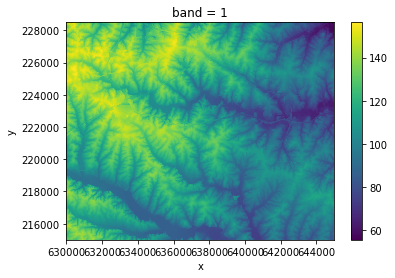

In [104]:
elevation.plot()

In [105]:
elevation.load()  # force to read the data from disk

<xarray.DataArray (band: 1, y: 1350, x: 1500)>
array([[[141.9961, 141.2785, 141.379 , ...,  58.4083,  58.3071,
          58.1831],
        [142.9046, 142.3945, 142.6861, ...,  58.3146,  58.3507,
          58.4073],
        [143.8185, 143.5471, 143.8397, ...,  58.2951,  58.4307,
          58.5632],
        ...,
        [126.253 , 126.9941, 127.5625, ...,  84.3854,  84.94  ,
          85.5589],
        [126.5512, 127.3874, 127.9889, ...,  84.0734,  84.6259,
          85.2706],
        [126.695 , 127.4992, 128.189 , ...,  84.0505,  84.8534,
          85.5548]]], dtype=float32)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 2.285e+05 2.285e+05 2.285e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.3e+05 ... 6.45e+05 6.45e+05 6.45e+05
Attributes:
    transform:      (10.0, 0.0, 630000.0, 0.0, -10.0, 228500.0)
    crs:            +proj=lcc +lat_0=33.75 +lon_0=-79 +lat_1=36.1666666666667...
    res:            (10.0, 10.0)
    is_tiled:       0
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

This means you can automatically chunk data with Dask using xarray as well:

In [108]:
xr.open_rasterio('Data/spatial/elevation.tif', chunks={'x': 500, 'y': 500})

<xarray.DataArray (band: 1, y: 1350, x: 1500)>
dask.array<open_rasterio-d33f212ab713523b524b9c363ca5deb9<this-array>, shape=(1, 1350, 1500), dtype=float32, chunksize=(1, 500, 500), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 2.285e+05 2.285e+05 2.285e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.3e+05 ... 6.45e+05 6.45e+05 6.45e+05
Attributes:
    transform:      (10.0, 0.0, 630000.0, 0.0, -10.0, 228500.0)
    crs:            +proj=lcc +lat_0=33.75 +lon_0=-79 +lat_1=36.1666666666667...
    res:            (10.0, 10.0)
    is_tiled:       0
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

### Exercise: Using xarray to calculate NDVI

$$ NDVI = \frac{nir - red}{nir + red} $$

In [113]:
landsat = xr.open_rasterio("Data/spatial/lsat7_2002/lsat.vrt", chunks={'x': 200, 'y': 200})
landsat

<xarray.DataArray (band: 9, y: 475, x: 527)>
dask.array<open_rasterio-bfa41ac54c24f8e8e9d747cd79b22a0f<this-array>, shape=(9, 475, 527), dtype=int32, chunksize=(9, 200, 200), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9
  * y        (y) float64 2.285e+05 2.285e+05 2.284e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.301e+05 ... 6.45e+05 6.45e+05
Attributes:
    transform:   (28.5, 0.0, 629992.5, 0.0, -28.5, 228513.0)
    crs:         +proj=lcc +lat_0=33.75 +lon_0=-79 +lat_1=36.1666666666667 +l...
    res:         (28.5, 28.5)
    is_tiled:    1
    nodatavals:  (-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999...
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [110]:
landsat[0]

<xarray.DataArray (y: 475, x: 527)>
[250325 values with dtype=int32]
Coordinates:
    band     int64 1
  * y        (y) float64 2.285e+05 2.285e+05 2.284e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.301e+05 ... 6.45e+05 6.45e+05
Attributes:
    transform:   (28.5, 0.0, 629992.5, 0.0, -28.5, 228513.0)
    crs:         +proj=lcc +lat_0=33.75 +lon_0=-79 +lat_1=36.1666666666667 +l...
    res:         (28.5, 28.5)
    is_tiled:    1
    nodatavals:  (-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999...
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [111]:
landsat.loc[1]  # this selects by the actual key (not just position)

<xarray.DataArray (y: 475, x: 527)>
[250325 values with dtype=int32]
Coordinates:
    band     int64 1
  * y        (y) float64 2.285e+05 2.285e+05 2.284e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.301e+05 ... 6.45e+05 6.45e+05
Attributes:
    transform:   (28.5, 0.0, 629992.5, 0.0, -28.5, 228513.0)
    crs:         +proj=lcc +lat_0=33.75 +lon_0=-79 +lat_1=36.1666666666667 +l...
    res:         (28.5, 28.5)
    is_tiled:    1
    nodatavals:  (-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999...
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In landsat band 5 is Near Infra-red, band 4 is Red. Select the bands and calculate the NDVI value. Plot the result.

In [112]:
landsat.dims

('band', 'y', 'x')

In [114]:
red = landsat.loc[4]

In [115]:
nir = landsat.loc[5]

In [117]:
ndvi = (nir - red) / (nir + red)

In [127]:
ndvi

<xarray.DataArray (y: 475, x: 527)>
array([[-0.24038462, -0.21621622, -0.13513514, ..., -0.30927835,
        -0.27638191, -0.11004785],
       [-0.2460733 , -0.18324607,  0.01886792, ..., -0.28712871,
        -0.28767123, -0.24761905],
       [-0.11340206, -0.21428571,  0.01886792, ..., -0.13913043,
        -0.17209302, -0.30805687],
       ...,
       [-0.19708029, -0.34640523, -0.18018018, ..., -0.25316456,
        -0.23870968, -0.13207547],
       [-0.17419355, -0.27810651, -0.20772947, ..., -0.28205128,
        -0.35099338, -0.22651934],
       [-0.1038961 , -0.24358974, -0.18032787, ..., -0.22404372,
        -0.32515337, -0.19371728]])
Coordinates:
  * y        (y) float64 2.285e+05 2.285e+05 2.284e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.301e+05 ... 6.45e+05 6.45e+05

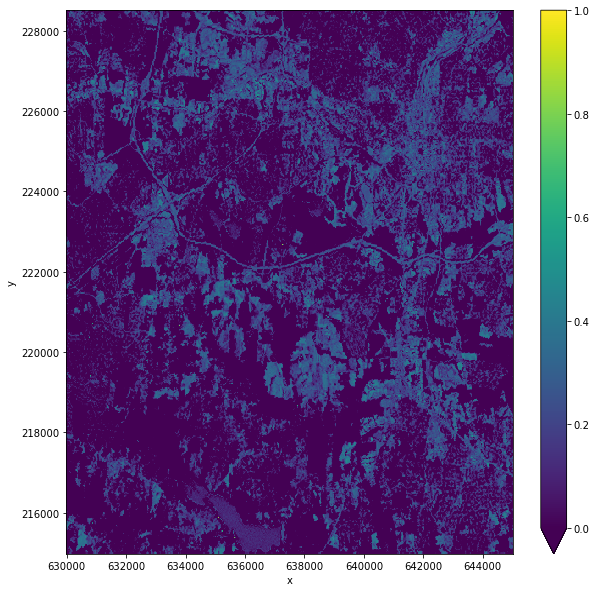

In [122]:
ndvi.compute().plot(vmin=0, vmax=1, figsize=(10, 10))

What happens if you you want to compare data from two datasets?

In [123]:
ndvi = ndvi.compute()

In [125]:
ndvi / elevation

<xarray.DataArray (y: 0, x: 0, band: 1)>
array([], shape=(0, 0, 1), dtype=float64)
Coordinates:
  * y        (y) float64 
  * x        (x) float64 
  * band     (band) int64 1

When you compare datasets it compares of the coordinate values exactly.

In [126]:
ndvi.interp_like(elevation)  # a very simple linear interpolation 

<xarray.DataArray (y: 1350, x: 1500)>
array([[        nan, -0.23266455, -0.22239961, ..., -0.24766108,
        -0.19512844, -0.1425958 ],
       [        nan, -0.23073401, -0.2157096 , ..., -0.26056187,
        -0.22357639, -0.18659092],
       [        nan, -0.22880348, -0.20901958, ..., -0.27346265,
        -0.25202435, -0.23058605],
       ...,
       [        nan, -0.21280759, -0.25304212, ..., -0.30013914,
        -0.25794658, -0.21575401],
       [        nan, -0.19743837, -0.23533072, ..., -0.32277335,
        -0.27881968, -0.23486601],
       [        nan, -0.17640683, -0.21870432, ..., -0.31321383,
        -0.26840303, -0.22359223]])
Coordinates:
  * y        (y) float64 2.285e+05 2.285e+05 2.285e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.3e+05 ... 6.45e+05 6.45e+05 6.45e+05

In [128]:
ndvi.interp_like?

Signature:
ndvi.interp_like(
    other: Union[ForwardRef('DataArray'), xarray.core.dataset.Dataset],
    method: str = 'linear',
    assume_sorted: bool = False,
    kwargs: Mapping[str, Any] = None,
) -> 'DataArray'
Docstring:
Interpolate this object onto the coordinates of another object,
filling out of range values with NaN.

Parameters
----------
other : Dataset or DataArray
    Object with an 'indexes' attribute giving a mapping from dimension
    names to an 1d array-like, which provides coordinates upon
    which to index the variables in this dataset. Missing values are skipped.
method : str, default: "linear"
    The method used to interpolate. Choose from

    - {"linear", "nearest"} for multidimensional array,
    - {"linear", "nearest", "zero", "slinear", "quadratic", "cubic"} for 1-dimensional array.
assume_sorted : bool, optional
    If False, values of coordinates that are interpolated over can be
    in any order and they are sorted first. If True, interpolated
    coor

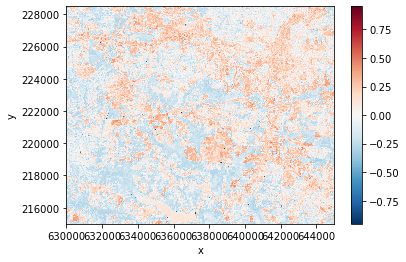

In [130]:
ndvi.interp_like(elevation, method='nearest').plot()

In [132]:
wind = xr.open_dataset("Data/spatial/zonal_wind.nc")

In [135]:
wind

<xarray.Dataset>
Dimensions:     (lat: 240, lon: 240, rho_lvl: 50, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2011-08-11
  * lat         (lat) float32 -34.05 -34.1 -34.15 -34.2 ... -45.9 -45.95 -46.0
  * lon         (lon) float32 139.0 139.1 139.1 139.1 ... 150.9 150.9 150.9
  * rho_lvl     (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04
Data variables:
    seg_type    (time) |S4 b'fc  '
    A_rho       (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04
    B_rho       (rho_lvl) float32 0.9989 0.9943 0.9851 0.9715 ... 0.0 0.0 0.0
    base_date   (time) int32 20110809
    base_time   (time) int32 1200
    valid_date  (time) int32 20110811
    valid_time  (time) int32 0
    forc_hrs    (time) timedelta64[ns] 1 days 12:00:00
    wrtn_date   (time) int32 110809
    wrtn_time   (time) int32 1519
    zonal_wnd   (time, rho_lvl, lat, lon) float32 ...
    merid_wnd   (time, rho_lvl, lat, lon) float32 ...
Attributes:
    positive:    up
    convention:  COARDS
    source:      Australian Bureau of Meteorology
    modl_vrsn:   ACCESS-V
    expt_id:     0001

In [134]:
wind["zonal_wnd"]

<xarray.DataArray 'zonal_wnd' (time: 1, rho_lvl: 50, lat: 240, lon: 240)>
[2880000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.1 -34.15 -34.2 ... -45.9 -45.95 -46.0
  * lon      (lon) float32 139.0 139.1 139.1 139.1 ... 150.8 150.9 150.9 150.9
  * rho_lvl  (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

In [136]:
wind

<xarray.Dataset>
Dimensions:     (lat: 240, lon: 240, rho_lvl: 50, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2011-08-11
  * lat         (lat) float32 -34.05 -34.1 -34.15 -34.2 ... -45.9 -45.95 -46.0
  * lon         (lon) float32 139.0 139.1 139.1 139.1 ... 150.9 150.9 150.9
  * rho_lvl     (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04
Data variables:
    seg_type    (time) |S4 b'fc  '
    A_rho       (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04
    B_rho       (rho_lvl) float32 0.9989 0.9943 0.9851 0.9715 ... 0.0 0.0 0.0
    base_date   (time) int32 20110809
    base_time   (time) int32 1200
    valid_date  (time) int32 20110811
    valid_time  (time) int32 0
    forc_hrs    (time) timedelta64[ns] 1 days 12:00:00
    wrtn_date   (time) int32 110809
    wrtn_time   (time) int32 1519
    zonal_wnd   (time, rho_lvl, lat, lon) float32 ...
    merid_wnd   (time, rho_lvl, lat, lon) float32 ...
Attributes:
    positive:    up
    convention:  COARDS
    source:      Australian Bureau of Meteorology
    modl_vrsn:   ACCESS-V
    expt_id:     0001

In [138]:
xr.Dataset(
    {"landsat": landsat, "sentinel": landsat, "modis": landsat}
)

<xarray.Dataset>
Dimensions:   (band: 9, x: 527, y: 475)
Coordinates:
  * band      (band) int64 1 2 3 4 5 6 7 8 9
  * y         (y) float64 2.285e+05 2.285e+05 2.284e+05 ... 2.15e+05 2.15e+05
  * x         (x) float64 6.3e+05 6.3e+05 6.301e+05 ... 6.45e+05 6.45e+05
Data variables:
    landsat   (band, y, x) int32 dask.array<chunksize=(9, 200, 200), meta=np.ndarray>
    sentinel  (band, y, x) int32 dask.array<chunksize=(9, 200, 200), meta=np.ndarray>
    modis     (band, y, x) int32 dask.array<chunksize=(9, 200, 200), meta=np.ndarray>

In [137]:
landsat

<xarray.DataArray (band: 9, y: 475, x: 527)>
dask.array<open_rasterio-bfa41ac54c24f8e8e9d747cd79b22a0f<this-array>, shape=(9, 475, 527), dtype=int32, chunksize=(9, 200, 200), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9
  * y        (y) float64 2.285e+05 2.285e+05 2.284e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.301e+05 ... 6.45e+05 6.45e+05
Attributes:
    transform:   (28.5, 0.0, 629992.5, 0.0, -28.5, 228513.0)
    crs:         +proj=lcc +lat_0=33.75 +lon_0=-79 +lat_1=36.1666666666667 +l...
    res:         (28.5, 28.5)
    is_tiled:    1
    nodatavals:  (-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999.0, -9999...
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [141]:
list(wind.variables)

['time',
 'seg_type',
 'lat',
 'lon',
 'rho_lvl',
 'A_rho',
 'B_rho',
 'base_date',
 'base_time',
 'valid_date',
 'valid_time',
 'forc_hrs',
 'wrtn_date',
 'wrtn_time',
 'zonal_wnd',
 'merid_wnd']

Dataset -> DataArray -> raw data

In [147]:
imagery = xr.Dataset({'ndvi': ndvi, 'landsat': landsat})

In [148]:
imagery

<xarray.Dataset>
Dimensions:  (band: 9, x: 527, y: 475)
Coordinates:
  * y        (y) float64 2.285e+05 2.285e+05 2.284e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.301e+05 ... 6.45e+05 6.45e+05
  * band     (band) int64 1 2 3 4 5 6 7 8 9
Data variables:
    ndvi     (y, x) float64 -0.2404 -0.2162 -0.1351 ... -0.224 -0.3252 -0.1937
    landsat  (band, y, x) int32 dask.array<chunksize=(9, 200, 200), meta=np.ndarray>

In [149]:
imagery['ndvi']

<xarray.DataArray 'ndvi' (y: 475, x: 527)>
array([[-0.24038462, -0.21621622, -0.13513514, ..., -0.30927835,
        -0.27638191, -0.11004785],
       [-0.2460733 , -0.18324607,  0.01886792, ..., -0.28712871,
        -0.28767123, -0.24761905],
       [-0.11340206, -0.21428571,  0.01886792, ..., -0.13913043,
        -0.17209302, -0.30805687],
       ...,
       [-0.19708029, -0.34640523, -0.18018018, ..., -0.25316456,
        -0.23870968, -0.13207547],
       [-0.17419355, -0.27810651, -0.20772947, ..., -0.28205128,
        -0.35099338, -0.22651934],
       [-0.1038961 , -0.24358974, -0.18032787, ..., -0.22404372,
        -0.32515337, -0.19371728]])
Coordinates:
  * y        (y) float64 2.285e+05 2.285e+05 2.284e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.301e+05 ... 6.45e+05 6.45e+05

In [150]:
imagery.to_netcdf('imagery.nc')

In [151]:
xr.open_dataset('imagery.nc')

<xarray.Dataset>
Dimensions:  (band: 9, x: 527, y: 475)
Coordinates:
  * y        (y) float64 2.285e+05 2.285e+05 2.284e+05 ... 2.15e+05 2.15e+05
  * x        (x) float64 6.3e+05 6.3e+05 6.301e+05 ... 6.45e+05 6.45e+05
  * band     (band) int64 1 2 3 4 5 6 7 8 9
Data variables:
    ndvi     (y, x) float64 ...
    landsat  (band, y, x) int32 ...

## Lunch - back at 1:15

In [152]:
wind = xr.open_dataset("Data/spatial/zonal_wind.nc")

In [154]:
zonal = wind["zonal_wnd"]

### Indexing with xarray

In [156]:
zonal[0, 0]  # multi-demsional positional indexing (same as numpy)

<xarray.DataArray 'zonal_wnd' (lat: 240, lon: 240)>
array([[ 1.746712, -1.937746, -1.870728, ...,  1.559071,  1.700897,  1.746712],
       [ 1.825956, -2.003304, -1.937742, ...,  1.563639,  1.683851,  1.825956],
       [ 1.824835, -2.124119, -2.07836 , ...,  1.563559,  1.684151,  1.824835],
       ...,
       [-3.375   ,  1.999985,  2.000065, ..., -3.375065, -3.374985, -3.375   ],
       [-3.32332 ,  2.137337,  2.133352, ..., -3.222349, -3.328426, -3.32332 ],
       [-3.312565,  2.137577,  2.121634, ..., -3.372541, -3.387318, -3.312565]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.1 -34.15 -34.2 ... -45.9 -45.95 -46.0
  * lon      (lon) float32 139.0 139.1 139.1 139.1 ... 150.8 150.9 150.9 150.9
    rho_lvl  float32 9.998
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

In [157]:
zonal[0, 0, 20: 30, 20: 30]

<xarray.DataArray 'zonal_wnd' (lat: 10, lon: 10)>
array([[-1.750174, -1.749128, -1.753309, -1.737633, -1.811783, -1.890236,
        -1.86165 , -1.928789, -2.06382 , -2.190929],
       [-1.871809, -1.886684, -1.815825, -1.725014, -1.815369, -1.888514,
        -1.86495 , -1.917307, -2.12207 , -2.344412],
       [-1.993437, -2.010548, -1.948751, -1.803822, -1.726583, -1.821093,
        -1.864048, -1.988342, -2.19821 , -2.328192],
       [-2.13406 , -2.13212 , -2.071836, -1.939913, -1.793514, -1.792278,
        -1.943623, -2.058231, -2.198452, -2.257334],
       [-2.140877, -2.118639, -2.134565, -2.077477, -1.914904, -1.919159,
        -2.064711, -2.196999, -2.256668, -2.260706],
       [-2.040739, -2.200195, -2.267857, -2.19713 , -2.052994, -1.981516,
        -2.052195, -2.200333, -2.25585 , -2.260639],
       [-1.956247, -2.116066, -2.345118, -2.331587, -2.172281, -2.119913,
        -2.113691, -2.190947, -2.247524, -2.318958],
       [-2.094707, -2.178324, -2.332623, -2.334936, -2.171383, -2.120159,
        -2.113605, -2.191046, -2.247213, -2.320103],
       [-2.287498, -2.299921, -2.403442, -2.305058, -2.251324, -2.189644,
        -2.115099, -2.115587, -2.188179, -2.256697],
       [-2.57058 , -2.437803, -2.303207, -2.239994, -2.252443, -2.250231,
        -2.246634, -2.263235, -2.184799, -2.122564]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-08-11
  * lat      (lat) float32 -35.05 -35.1 -35.15 -35.2 ... -35.4 -35.45 -35.5
  * lon      (lon) float32 140.0 140.1 140.1 140.1 ... 140.3 140.4 140.4 140.4
    rho_lvl  float32 9.998
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

In [158]:
zonal.loc['2011-08-11']

<xarray.DataArray 'zonal_wnd' (rho_lvl: 50, lat: 240, lon: 240)>
[2880000 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.1 -34.15 -34.2 ... -45.9 -45.95 -46.0
  * lon      (lon) float32 139.0 139.1 139.1 139.1 ... 150.8 150.9 150.9 150.9
  * rho_lvl  (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

In [161]:
wind.coords["rho_lvl"][0]

<xarray.DataArray 'rho_lvl' ()>
array(9.997773, dtype=float32)
Coordinates:
    rho_lvl  float32 9.998
Attributes:
    long_name:      height of hybrid rho levels
    standard_name:  atmosphere_hybrid_height_coordinate
    formula_terms:  a: A_rho b: B_rho orog: topo

In [159]:
zonal.loc[:, 9.998]

KeyError: 9.998000144958496

In [162]:
zonal.loc[:, 9: 10]

<xarray.DataArray 'zonal_wnd' (time: 1, rho_lvl: 1, lat: 240, lon: 240)>
array([[[[ 1.746712, ...,  1.746712],
         ...,
         [-3.312565, ..., -3.312565]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.1 -34.15 -34.2 ... -45.9 -45.95 -46.0
  * lon      (lon) float32 139.0 139.1 139.1 139.1 ... 150.8 150.9 150.9 150.9
  * rho_lvl  (rho_lvl) float32 9.998
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

In [165]:
zonal.loc[:, :, -30: -40]

<xarray.DataArray 'zonal_wnd' (time: 1, rho_lvl: 50, lat: 120, lon: 240)>
[1440000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.1 -34.15 -34.2 ... -39.9 -39.95 -40.0
  * lon      (lon) float32 139.0 139.1 139.1 139.1 ... 150.8 150.9 150.9 150.9
  * rho_lvl  (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

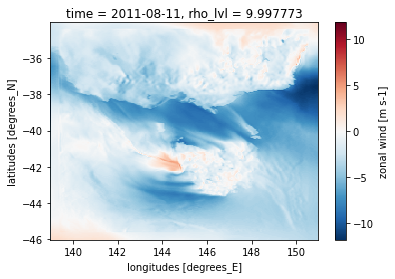

In [168]:
zonal.loc['2011-08-11', :10].plot()

In [169]:
hobart

(147.325, -42.88)

In [170]:
zonal.loc['2011-08-11', :, -42.88, 147.325]

KeyError: -42.880001068115234

In [172]:
zonal.sel(
    time='2011-08-11',
    lat=-42.88,
    lon=147.325,
    method='nearest'
)

<xarray.DataArray 'zonal_wnd' (rho_lvl: 50)>
array([ -0.438389,  -0.895153,  -1.035625,  -1.077109,  -1.190451,  -1.532642,
        -2.320791,  -3.459978,  -3.567142,  -2.656391,  -2.045193,  -1.04792 ,
        -1.040745,  -2.438604,  -3.112577,  -1.433232,  -1.486297,  -2.628413,
        -2.785461,  -2.565132,  -2.049976,   0.384922,   1.052994,   5.676486,
         8.567008,  10.373794,  10.996636,  12.621616,  15.140701,  17.81244 ,
        18.75    ,  19.2372  ,  21.124992,  24.49992 ,  26.612505,  30.125   ,
        33.375   ,  38.488277,  45.35938 ,  53.49998 ,  62.750965,  71.98834 ,
        78.000305,  84.74881 ,  94.23737 , 105.437256, 106.37162 , 108.987404,
       120.487366, 121.49905 ], dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-08-11
    lat      float32 -42.9
    lon      float32 147.3
  * rho_lvl  (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

In [173]:
melbourne = (144.963, -37.814)

In [175]:
zonal.sel(lon=(hobart[0], melbourne[0]), lat=(hobart[1], melbourne[1]), method='nearest')

<xarray.DataArray 'zonal_wnd' (time: 1, rho_lvl: 50, lat: 2, lon: 2)>
array([[[[-4.383888e-01, -6.318384e+00],
         [-2.324291e+00, -2.656393e+00]],

        [[-8.951530e-01, -6.943325e+00],
         [-4.019753e+00, -4.385386e+00]],

        [[-1.035625e+00, -6.802654e+00],
         [-5.632195e+00, -5.657133e+00]],

        [[-1.077109e+00, -6.327117e+00],
         [-7.449218e+00, -6.916499e+00]],

        [[-1.190451e+00, -2.667501e+00],
         [-9.573164e+00, -9.276556e+00]],

        [[-1.532642e+00, -1.371445e+00],
         [-1.175920e+01, -1.186021e+01]],

        [[-2.320791e+00, -3.319937e+00],
         [-1.464618e+01, -1.212421e+01]],

        [[-3.459978e+00, -4.176098e+00],
         [-1.517933e+01, -9.742882e+00]],

        [[-3.567142e+00, -6.309652e+00],
         [-1.372842e+01, -8.412493e+00]],

        [[-2.656391e+00, -4.625954e+00],
         [-1.299051e+01, -8.359541e+00]],

        [[-2.045193e+00, -3.058880e+00],
         [-1.242840e+01, -1.122599e+01]],

        [[-1.047920e+00, -1.374987e+00],
         [-1.225677e+01, -1.261870e+01]],

        [[-1.040745e+00, -2.004490e+00],
         [-1.212404e+01, -1.276593e+01]],

        [[-2.438604e+00, -1.319164e+00],
         [-1.281318e+01, -1.281539e+01]],

        [[-3.112577e+00, -3.785686e-01],
         [-1.167380e+01, -1.151413e+01]],

        [[-1.433232e+00, -1.233530e-01],
         [-9.565886e+00, -8.639911e+00]],

        [[-1.486297e+00, -2.525830e+00],
         [-7.938384e+00, -6.011079e+00]],

        [[-2.628413e+00, -3.119760e+00],
         [-6.249209e+00, -5.442594e+00]],

        [[-2.785461e+00, -2.763271e+00],
         [ 6.329346e-02, -5.759644e+00]],

        [[-2.565132e+00, -1.549252e+00],
         [ 1.763500e+00, -4.366222e+00]],

        [[-2.049976e+00,  1.401550e+00],
         [ 2.559643e+00, -1.425987e+00]],

        [[ 3.849220e-01,  1.876736e+00],
         [ 2.012058e+00,  9.988213e-01]],

        [[ 1.052994e+00,  2.184460e+00],
         [-3.361626e-01,  2.611660e+00]],

        [[ 5.676486e+00,  7.140683e+00],
         [ 3.243808e+00,  6.066579e+00]],

        [[ 8.567008e+00,  1.043720e+01],
         [ 9.688210e+00,  1.164213e+01]],

        [[ 1.037379e+01,  1.249887e+01],
         [ 1.169112e+01,  1.475008e+01]],

        [[ 1.099664e+01,  1.248431e+01],
         [ 1.285836e+01,  1.560795e+01]],

        [[ 1.262162e+01,  1.349686e+01],
         [ 1.501619e+01,  1.687491e+01]],

        [[ 1.514070e+01,  1.606363e+01],
         [ 1.613757e+01,  1.762381e+01]],

        [[ 1.781244e+01,  1.875000e+01],
         [ 1.788852e+01,  1.750338e+01]],

        [[ 1.875000e+01,  1.937500e+01],
         [ 1.576256e+01,  1.600006e+01]],

        [[ 1.923720e+01,  2.031248e+01],
         [ 1.299665e+01,  1.389068e+01]],

        [[ 2.112499e+01,  2.231159e+01],
         [ 1.613755e+01,  1.668750e+01]],

        [[ 2.449992e+01,  2.418652e+01],
         [ 1.431153e+01,  1.474646e+01]],

        [[ 2.661250e+01,  2.648414e+01],
         [ 1.711262e+01,  1.612501e+01]],

        [[ 3.012500e+01,  3.075089e+01],
         [ 2.025306e+01,  1.888175e+01]],

        [[ 3.337500e+01,  3.368863e+01],
         [ 2.301346e+01,  2.262433e+01]],

        [[ 3.848828e+01,  3.801173e+01],
         [ 2.626346e+01,  2.587831e+01]],

        [[ 4.535938e+01,  4.412524e+01],
         [ 3.087500e+01,  3.062188e+01]],

        [[ 5.349998e+01,  5.173767e+01],
         [ 3.686244e+01,  3.663640e+01]],

        [[ 6.275097e+01,  6.126619e+01],
         [ 4.474886e+01,  4.512170e+01]],

        [[ 7.198834e+01,  7.110938e+01],
         [ 5.000000e+01,  5.074998e+01]],

        [[ 7.800031e+01,  7.849663e+01],
         [ 5.399994e+01,  5.456274e+01]],

        [[ 8.474881e+01,  8.701262e+01],
         [ 5.987470e+01,  6.131244e+01]],

        [[ 9.423737e+01,  9.510938e+01],
         [ 6.337613e+01,  6.692518e+01]],

        [[ 1.054373e+02,  1.085043e+02],
         [ 6.168752e+01,  6.512494e+01]],

        [[ 1.063716e+02,  1.101261e+02],
         [ 6.788756e+01, 

What if we had a dataset of placenames and in that dataset we had coordinates we want to use to select data.

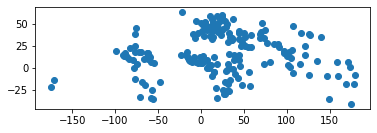

In [180]:
gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).plot()  # Sydney, but not even Melbourne

In [185]:
places = gpd.read_file('Data/spatial/ne_10m_populated_places.shp', driver='ESRI Shapefile')

In [186]:
len(places)

7343

In [189]:
import pandas as pd

In [194]:
pd.options.display.max_cols = None
pd.options.display.max_rows = 100

In [197]:
aus_places = places[places['ISO_A2'] == 'AU']

In [198]:
aus_places['geometry'].x

1775    151.300005
1776    153.050027
1784    145.933333
4625    131.816698
4626    131.099998
           ...    
7084    153.033147
7085    147.295030
7220    115.838053
7260    144.973070
7286    151.183234
Length: 224, dtype: float64

In [199]:
zonal = wind['zonal_wnd']

### Extacting the wind speed for each place

Use the `aus_places['geometry'].x` and `aus_places['geometry'].y` with `zonal.sel` function (using the nearest method) select the wind speeds for each place, and get the `rho_lvl=9.998`, and the `time='2011-08-11'`

This should return a 2d array where the diagonal is the wind speed ~10m above ground level.

NumPy has a `diagnoal` function. If you supply a 2d array to the diagonal function it gives you back an array of the values from the diagonal:

`np.diagonal(zonal_selection)`

In [200]:
import numpy as np

In [207]:
zonal_selection = zonal.sel(
    time='2011-08-11',
    lat=aus_places['geometry'].y,
    lon=aus_places['geometry'].x,
    method = 'nearest'
)

In [208]:
zonal_selection

<xarray.DataArray 'zonal_wnd' (rho_lvl: 50, lat: 224, lon: 224)>
[2508800 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2011-08-11
  * lat      (lat) float32 -34.05 -34.05 -34.05 -34.05 ... -34.05 -37.8 -34.05
  * lon      (lon) float32 150.9 150.9 145.9 139.0 ... 147.3 139.0 144.9 150.9
  * rho_lvl  (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04
Attributes:
    grid_type:   spatial
    level_type:  multi   
    units:       m s-1
    long_name:   zonal wind
    stash_code:  0
    accum_type:  instantaneous

In [209]:
np.diagonal?

Signature: np.diagonal(a, offset=0, axis1=0, axis2=1)
Docstring:
Return specified diagonals.

If `a` is 2-D, returns the diagonal of `a` with the given offset,
i.e., the collection of elements of the form ``a[i, i+offset]``.  If
`a` has more than two dimensions, then the axes specified by `axis1`
and `axis2` are used to determine the 2-D sub-array whose diagonal is
returned.  The shape of the resulting array can be determined by
removing `axis1` and `axis2` and appending an index to the right equal
to the size of the resulting diagonals.

In versions of NumPy prior to 1.7, this function always returned a new,
independent array containing a copy of the values in the diagonal.

In NumPy 1.7 and 1.8, it continues to return a copy of the diagonal,
but depending on this fact is deprecated. Writing to the resulting
array continues to work as it used to, but a FutureWarning is issued.

Starting in NumPy 1.9 it returns a read-only view on the original array.
Attempting to write to the resultin

In [213]:
np.diagonal(zonal_selection, axis1=1, axis2=2).shape

(50, 224)

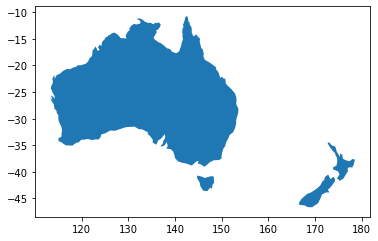

In [215]:
australia.plot()

For example, what if I wanted aggregate stats for only land areas. If I have a polygon boundary then I can "rasterize" the polygon

We're going to use `rasterio` to turn the polygon into the selection mask (a raster).

In [217]:
import rasterio

In [218]:
rasterio.open('Data/spatial/zonal_wind.nc')

/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<open DatasetReader name='Data/spatial/zonal_wind.nc' mode='r'>

In [219]:
import rasterio.features

In [220]:
rasterio.features.rasterize?

Signature:
rasterio.features.rasterize(
    shapes,
    out_shape=None,
    fill=0,
    out=None,
    transform=Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0),
    all_touched=False,
    merge_alg=<MergeAlg.replace: 'REPLACE'>,
    default_value=1,
    dtype=None,
)
Docstring:
Return an image array with input geometries burned in.

Warnings will be raised for any invalid or empty geometries, and
an exception will be raised if there are no valid shapes
to rasterize.

Parameters
----------
shapes : iterable of (`geometry`, `value`) pairs or iterable over
    geometries. The `geometry` can either be an object that
    implements the geo interface or GeoJSON-like object. If no
    `value` is provided the `default_value` will be used. If `value`
    is `None` the `fill` value will be used.
out_shape : tuple or list with 2 integers
    Shape of output numpy ndarray.
fill : int or float, optional
    Used as fill value for all areas not covered by input
    geometries.
out : numpy ndarray, optio

THe shapes we have. The size we have (from the zonal dataset lat and lons). We don't have the transform to turn from projected coords to cell coords.

In [221]:
from affine import Affine

- a = x cellsize
- b = x rotation
- c = x coord
- d = y rotation
- e = -ve y cell size
- f = y coord

In [249]:
transform = Affine(
    0.05, 0, 139, 0, -0.05, -34.05
)

In [250]:
~transform * hobart  # the ~ is the "inverse transform" - from lat, lon to cell coords

(166.5, 176.60000000000002)

In [260]:
mask = rasterio.features.rasterize(
    australia["geometry"],
    (240, 240),
    transform=transform,
).astype(np.bool)

In [261]:
mask.shape

(240, 240)

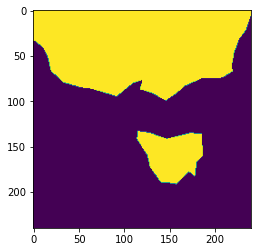

In [262]:
plt.imshow(mask)

Since we can treat this as boolean we can use it to index the zonal data

In [263]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [266]:
zonal[0, 0].values[mask]  # classic numpy boolean indexing is the easiest

array([ 1.7467117, -1.937746 , -1.8707275, ..., -1.4428883, -2.9219742,
       -2.299017 ], dtype=float32)

Better yet use the clip function in `rioxarray` 

In [267]:
! pip install rioxarray

     |████████████████████████████████| 46 kB 544 kB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 835 kB 25.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 35.7 MB/s eta 0:00:01
  Created wheel for rioxarray: filename=rioxarray-0.9.0-py3-none-any.whl size=54395 sha256=24efc5fb4caf27dc7a4545732a6ffc712b233b0a48da9ef0e5b5dd3db95574fb
  Stored in directory: /home/jovyan/.cache/pip/wheels/62/a7/b6/c454ecc7569ea4bb75186994c52fb2fb2a896a1f5a447ddff1
Successfully built rioxarray
ERROR: pysal 2.3.0 has requirement python-dateutil<=2.8.0, but you'll have python-dateutil 2.8.1 which is incompatible.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: xarray
    Found existing installation: xarray 0.16.2
    Uninstalling x

If you want to do spatial selection use `rioxarray` -> extends xarray to include the functions from rasterio (a bit like geopandas and pandas)

### A look at some bigger data with xarray

In [269]:
rain = xr.open_dataset("Data/spatial/rain_day_2020.nc")

In [270]:
rain

<xarray.Dataset>
Dimensions:    (latitude: 681, longitude: 841, time: 329)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-11-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
Data variables:
    rain_day   (time, latitude, longitude) float32 ...
Attributes:
    var_name:       rain_day
    title:          Australian Landscape Water Balance AWRA-L Model
    Description:    This data is provided by the Bureau of Meteorology and ca...
    summary:        Data produced by Bureau of Meteorology Australian Water R...
    source:         AWRA-L
    date_created:   2020-11-24T19:25:55
    Conventions:    CF-1.6, ACDD-1.3
    institution:    Bureau of Meteorology
    email:          awrams@bom.gov.au
    url:            http://www.bom.gov.au/water/landscape
    date_modified:  2020-11-24T19:27:21

Don't try and read this in memory all at once! Make sure you supply chunks! A good rule of thumb is each chunk should be ~100mb

In [276]:
(100 * 1024 * 1024 / 4) ** (1/3)

297.06168535121776

Our goal is to find the maximum rainfall at any point over 2020. Read the data with chunks of ~290 for latitude and longitude

In [282]:
xr.open_dataset("Data/spatial/rain_day_2020.nc", chunks='auto')['rain_day']

<xarray.DataArray 'rain_day' (time: 329, latitude: 681, longitude: 841)>
dask.array<open_dataset-663cb031bca27d0e623437f905e09381rain_day, shape=(329, 681, 841), dtype=float32, chunksize=(322, 227, 322), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-11-24
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
Attributes:
    name:           rain_day
    standard_name:  lwe_thickness_of_precipitation_amount
    long_name:      Daily Rainfall
    units:          mm

`'auto'` tries to get chunks around 100mb, but doesn't consider the calculations. We will be calculating across time, so if we can avoid chunking time

In [288]:
rain_day = xr.open_dataset("Data/spatial/rain_day_2020.nc", chunks={"latitude": 290, "longitude": 290})['rain_day']

xarray supports functions and aggregations directly from the data

In [287]:
zonal.max(dim=['lat', 'lon'])

<xarray.DataArray 'zonal_wnd' (time: 1, rho_lvl: 50)>
array([[  5.0786915,   5.4715843,   5.840576 ,   6.0320177,   6.161186 ,
          8.58057  ,   7.3999577,   7.563341 ,   4.2640305,   6.1584415,
          9.059198 ,   9.548727 ,  10.374275 ,  10.88756  ,  12.262625 ,
         14.012626 ,  15.762694 ,  17.012627 ,  17.15018  ,  16.524887 ,
         15.137627 ,  15.012566 ,  18.897442 ,  27.448242 ,  32.696262 ,
         33.056717 ,  31.059776 ,  28.134176 ,  22.565605 ,  22.887625 ,
         25.262543 ,  28.01256  ,  29.887577 ,  33.38756  ,  36.887558 ,
         39.512566 ,  43.762558 ,  50.262558 ,  57.13756  ,  64.8878   ,
         73.77519  ,  82.38756  ,  90.137566 ,  96.01256  , 107.88763  ,
        123.38756  , 132.26256  , 137.38756  , 138.76346  , 133.01257  ]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-08-11
  * rho_lvl  (rho_lvl) float32 9.998 50.0 130.0 ... 5.451e+04 5.997e+04

Using the rainfall calculate the max across the time dimension.

/opt/conda/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


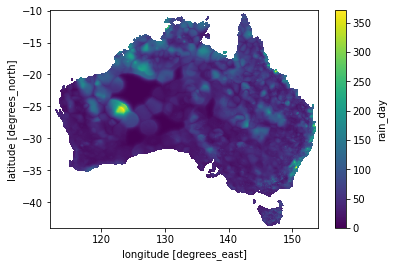

In [290]:
rain_day.max(dim='time').plot()

# after the break: 

- image processing and analysis (finding birds nests in IR data)
  - scikit-image (maximum filter moving window)
- pathfinding optimum routes through a surface
  - working with the john snow data and finding shortest walking path (instead of shorest straight line)
  
# back at 3:15

In [299]:
breeding_grounds = xr.open_rasterio("Data/spatial/shearwater/breeding_grounds.tif")

/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


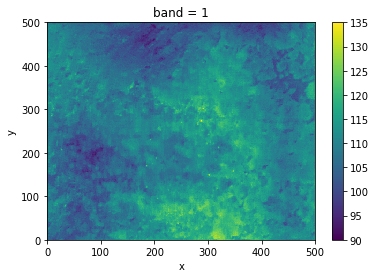

In [300]:
breeding_grounds.plot()

In [301]:
from skimage import filters

In [307]:
breeding_grounds = breeding_grounds.sel(band=1)

/opt/conda/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


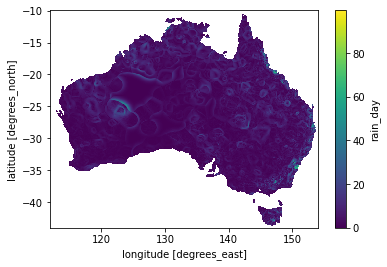

In [313]:
xr.apply_ufunc(filters.sobel, rain_day.max(dim='time'), dask='allowed').plot()

In [316]:
filters.rank.maximum?

Signature:
filters.rank.maximum(
    image,
    selem,
    out=None,
    mask=None,
    shift_x=False,
    shift_y=False,
    shift_z=False,
)
Docstring:
Return local maximum of an image.

Parameters
----------
image : ([P,] M, N) ndarray (uint8, uint16)
    Input image.
selem : ndarray
    The neighborhood expressed as an ndarray of 1's and 0's.
out : ([P,] M, N) array (same dtype as input)
    If None, a new array is allocated.
mask : ndarray (integer or float), optional
    Mask array that defines (>0) area of the image included in the local
    neighborhood. If None, the complete image is used (default).
shift_x, shift_y, shift_z : int
    Offset added to the structuring element center point. Shift is bounded
    to the structuring element sizes (center must be inside the given
    structuring element).

Returns
-------
out : ([P,] M, N) ndarray (same dtype as input image)
    Output image.

See also
--------
skimage.morphology.dilation

Notes
-----
The lower algorithm complexity m

In [317]:
import numpy as np

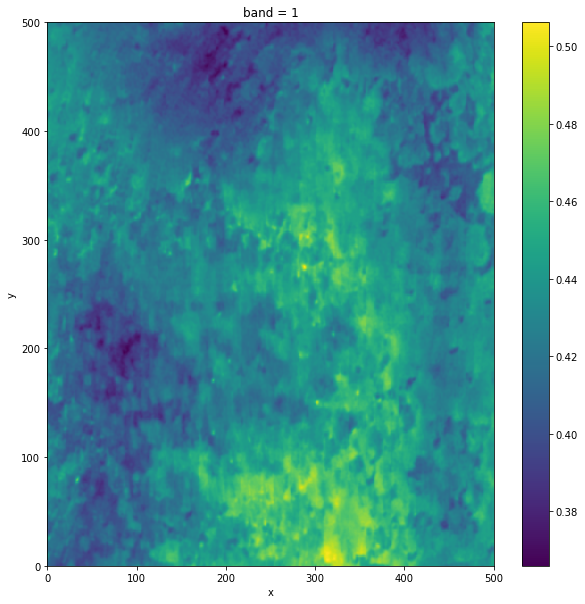

In [315]:
xr.apply_ufunc(filters.gaussian, breeding_grounds).plot(figsize=(10, 10))  

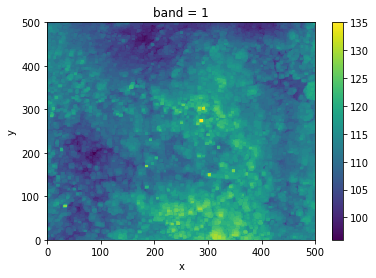

In [323]:
xr.apply_ufunc(filters.rank.maximum, breeding_grounds, kwargs={"selem": np.ones((5, 5))}).plot()

The selection element choice should be big enough to cover a birds nest but not so big we merge them together. 20cm-ish is the size of a nest. The size of each cell is ~3cm. So a `selem` of size 7 is enough to cover the nest but not far.

In [324]:
from skimage.morphology import disk

In [326]:
disk(4)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

To make it obvious I'll choose a selem of a disk of size 4

In [327]:
selem = disk(4)

In [329]:
import matplotlib.pyplot as plt

In [330]:
plt.rcParams["figure.figsize"] = (12, 8)

In [333]:
hotspots = xr.apply_ufunc(filters.rank.maximum, breeding_grounds, kwargs={"selem": selem})

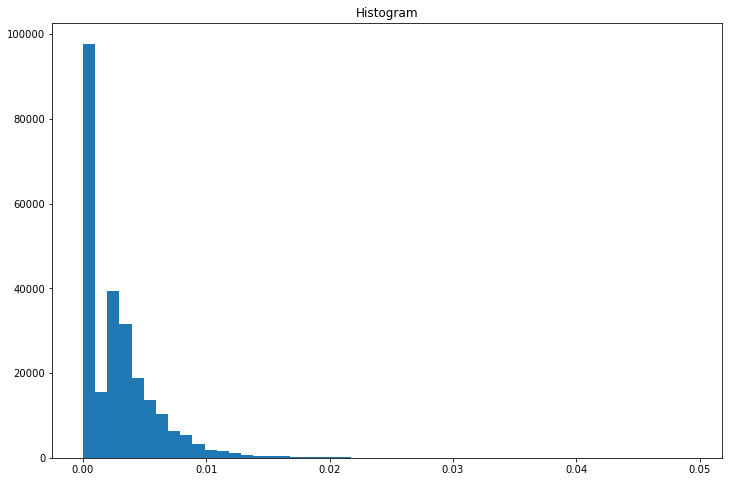

In [344]:
edges = xr.apply_ufunc(filters.sobel, hotspots)
edges.plot.hist(bins=50);

## Exercise: Calculating the edges and thresholding

Calculate the edges with the sobel filter on the hotspots and store that as an `edges = ...` variable.

All xarray data arrays have a `.quantile(0.99)` method which gives you the 99% cutoff for your data.

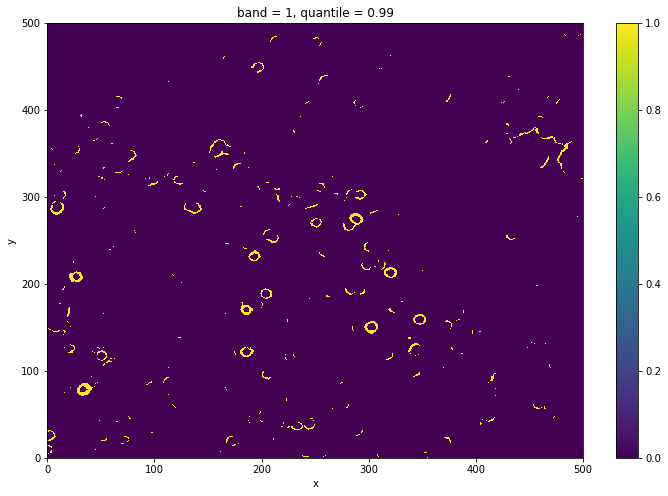

In [350]:
(edges > edges.quantile(0.99)).plot()

You can do a simple boolean comparison to compare the edges to the quantile. Plot the result - how noisy is it? What happens if you choose `0.9` or `0.995`?

In [342]:
from skimage.metrics import peak_signal_noise_ratio

In [356]:
peak_signal_noise_ratio(edges > edges.quantile(0.999), np.zeros(edges.shape, dtype=np.bool))

30.0

In [361]:
threshold = edges > edges.quantile(0.995)

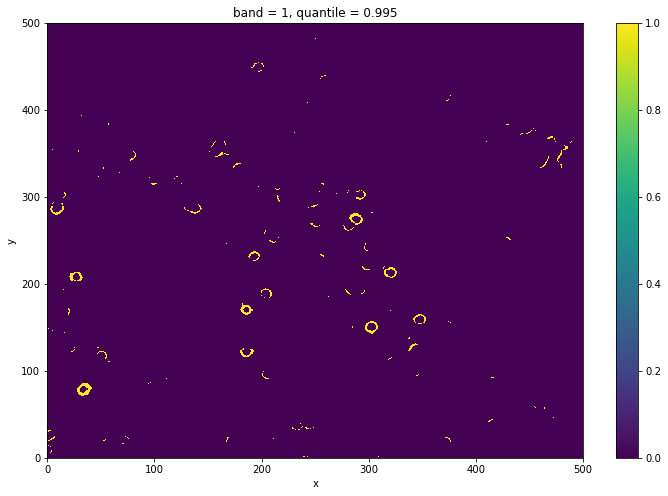

In [362]:
threshold.plot()

In [366]:
subset = threshold[250:350, 250: 350]

In [367]:
from skimage import morphology

In [378]:
closed_result = xr.apply_ufunc(morphology.closing, threshold, kwargs={"selem": selem})
opened_result = xr.apply_ufunc(morphology.opening, closed_result, kwargs={"selem": selem})

## Exercise

We are going to use a closing followed by an opening on the data. First use `morphology.closing` on the threshold data. Then use `morphology.opening` on the result. Finally use:

In [373]:
from skimage.measure import label

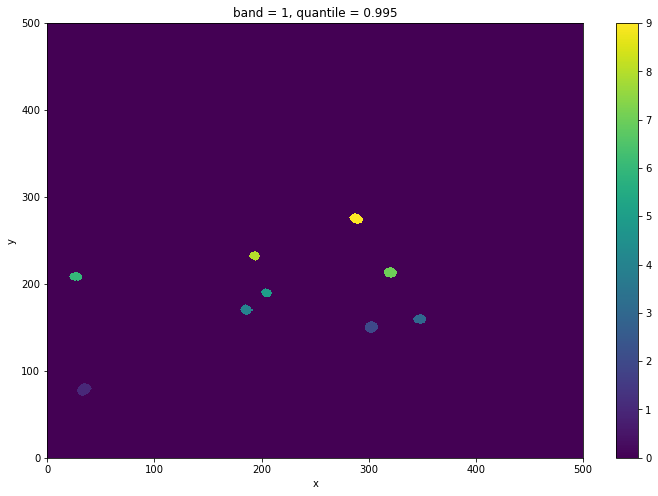

In [379]:
xr.apply_ufunc(label, opened_result).plot()

In [380]:
from skimage import metrics

In [381]:
from skimage.measure import regionprops

In [382]:
regionprops?

Signature:
regionprops(
    label_image,
    intensity_image=None,
    cache=True,
    coordinates=None,
    *,
    extra_properties=None,
)
Docstring:
Measure properties of labeled image regions.

Parameters
----------
label_image : (M, N[, P]) ndarray
    Labeled input image. Labels with value 0 are ignored.

    .. versionchanged:: 0.14.1
        Previously, ``label_image`` was processed by ``numpy.squeeze`` and
        so any number of singleton dimensions was allowed. This resulted in
        inconsistent handling of images with singleton dimensions. To
        recover the old behaviour, use
        ``regionprops(np.squeeze(label_image), ...)``.
intensity_image : (M, N[, P][, C]) ndarray, optional
    Intensity (i.e., input) image with same size as labeled image, plus
    optionally an extra dimension for multichannel data.
    Default is None.

    .. versionchanged:: 0.18.0
        The ability to provide an extra dimension for channels was added.
cache : bool, optional
    Deter

Doing this with a larger dataset:

In [ ]:
! pip install dask-image

I'll re-open with my data in chunks:

In [383]:
breeding_grounds = xr.open_rasterio("Data/spatial/shearwater/breeding_grounds.tif", chunks={"x": 250, "y": 250})[0]

/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [384]:
breeding_grounds

<xarray.DataArray (y: 500, x: 500)>
dask.array<getitem, shape=(500, 500), dtype=uint8, chunksize=(250, 250), chunktype=numpy.ndarray>
Coordinates:
    band     int64 1
  * y        (y) float64 0.5 1.5 2.5 3.5 4.5 ... 495.5 496.5 497.5 498.5 499.5
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 495.5 496.5 497.5 498.5 499.5
Attributes:
    transform:   (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
    res:         (1.0, -1.0)
    is_tiled:    0
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [389]:
import dask_image.imread
import dask_image.ndfilters

In [410]:
breeding_grounds = dask_image.imread.imread("Data/spatial/shearwater/breeding_grounds.tif")[0]

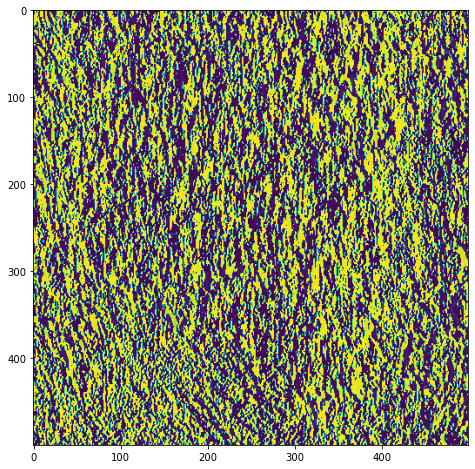

In [397]:
plt.imshow(dask_image.ndfilters.sobel(breeding_grounds).compute())

The steps we used in our pipeline:

1. read data
2. smoothed with a maximum filter
3. Sobel of the smoothed
4. Threshold the sobel
5. Closing morphology
6. Opening morphology
7. Labelling

In [399]:
smoothed = dask_image.ndfilters.maximum_filter(breeding_grounds, footprint=selem)

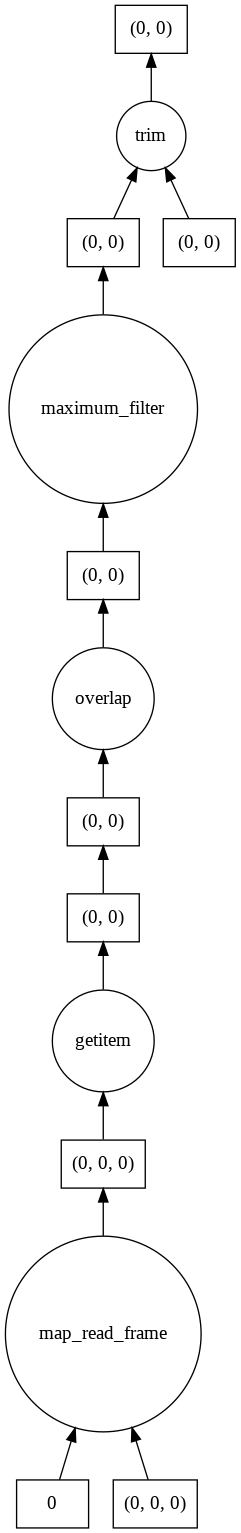

In [400]:
smoothed.visualize()

In [401]:
edges = dask_image.ndfilters.sobel(smoothed)

In [402]:
from dask import array as da

In [419]:
threshold = edges > da.percentile(edges.flatten(), 5)

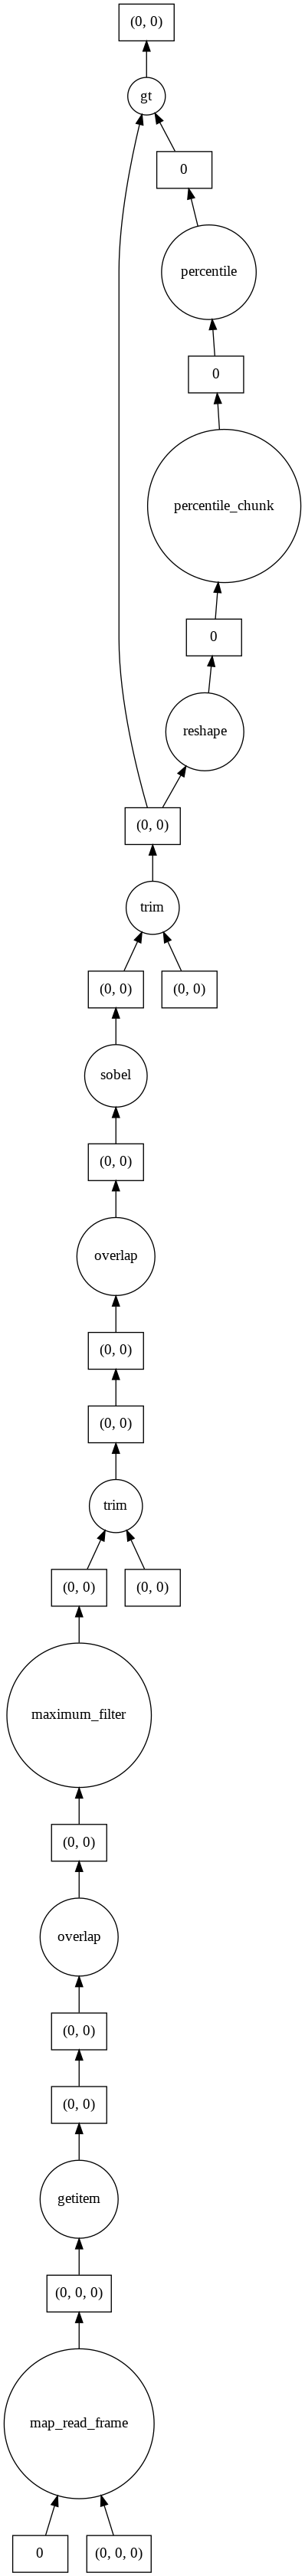

In [414]:
threshold.visualize()

In [406]:
import dask_image.ndmorph

In [420]:
closed_result = dask_image.ndmorph.binary_closing(threshold, selem)

In [421]:
opened_result = dask_image.ndmorph.binary_opening(closed_result, selem)

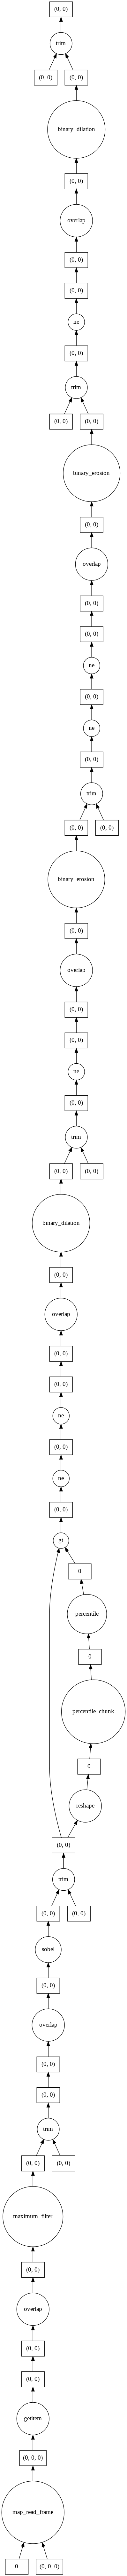

In [422]:
opened_result.visualize()

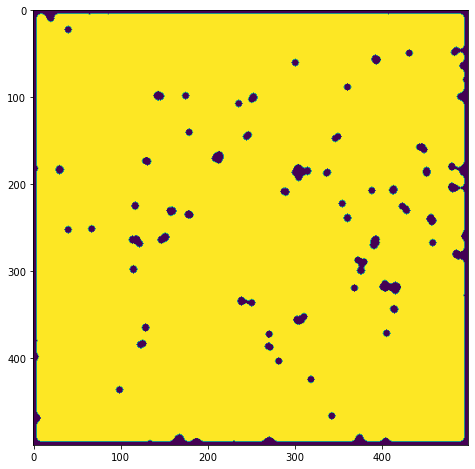

In [423]:
plt.imshow(opened_result.compute())

Do your proof of concept with xarray + scikit-image. Then try adding the `chunks` to your data read and `dask='allowed'` to your `apply_ufuncs`. Then take a look at dask-image - powerful, but not well doc'd and limited in functions.